In [5]:
%matplotlib inline
import numpy as np

print genRK(4)


def getChr(i):
    return chr(i + 97)

def genRK(n):
    print("# fourth order Runge-Kutta method in " + str(n) + " dimensions")
    u = ""
    v = ""
    f = ""
    for i in range(n):
        c = getChr(i)
        if i != 0:
            u += ", "
            v += ", "
            f += ", "
        u += c
        v += c + "k"
        f += "f" + c
    print("def rK" + str(n) + "(" + u + ", " + f + ", hs" + "):")
    for i in range(n):
        c = getChr(i)
        print("\t" + c + "1 = f" + c + "(" + u + ")*hs")
    for i in range(n):
        c = getChr(i)
        print("\t" + c + "k = " + c + " + " + c + "1*0.5")
    for i in range(n):
        c = getChr(i)
        print("\t" + c + "2 = f" + c + "(" + v + ")*hs")
    for i in range(n):
        c = getChr(i)
        print("\t" + c + "k = " + c + " + " + c + "2*0.5")
    for i in range(n):
        c = getChr(i)
        print("\t" + c + "3 = f" + c + "(" + v + ")*hs")
    for i in range(n):
        c = getChr(i)
        print("\t" + c + "k = " + c + " + " + c + "3")
    for i in range(n):
        c = getChr(i)
        print("\t" + c + "4 = f" + c + "(" + v + ")*hs")
    for i in range(n):
        c = getChr(i)
        print("\t" + c + " = " + c + " + (" + c + "1 + 2*(" + c + "2 + " + c + "3) + " + c + "4)/6")
    print("\treturn " + u)

# fourth order Runge-Kutta method in 4 dimensions
def rK4(a, b, c, d, fa, fb, fc, fd, hs):
	a1 = fa(a, b, c, d)*hs
	b1 = fb(a, b, c, d)*hs
	c1 = fc(a, b, c, d)*hs
	d1 = fd(a, b, c, d)*hs
	ak = a + a1*0.5
	bk = b + b1*0.5
	ck = c + c1*0.5
	dk = d + d1*0.5
	a2 = fa(ak, bk, ck, dk)*hs
	b2 = fb(ak, bk, ck, dk)*hs
	c2 = fc(ak, bk, ck, dk)*hs
	d2 = fd(ak, bk, ck, dk)*hs
	ak = a + a2*0.5
	bk = b + b2*0.5
	ck = c + c2*0.5
	dk = d + d2*0.5
	a3 = fa(ak, bk, ck, dk)*hs
	b3 = fb(ak, bk, ck, dk)*hs
	c3 = fc(ak, bk, ck, dk)*hs
	d3 = fd(ak, bk, ck, dk)*hs
	ak = a + a3
	bk = b + b3
	ck = c + c3
	dk = d + d3
	a4 = fa(ak, bk, ck, dk)*hs
	b4 = fb(ak, bk, ck, dk)*hs
	c4 = fc(ak, bk, ck, dk)*hs
	d4 = fd(ak, bk, ck, dk)*hs
	a = a + (a1 + 2*(a2 + a3) + a4)/6
	b = b + (b1 + 2*(b2 + b3) + b4)/6
	c = c + (c1 + 2*(c2 + c3) + c4)/6
	d = d + (d1 + 2*(d2 + d3) + d4)/6
	return a, b, c, d
None


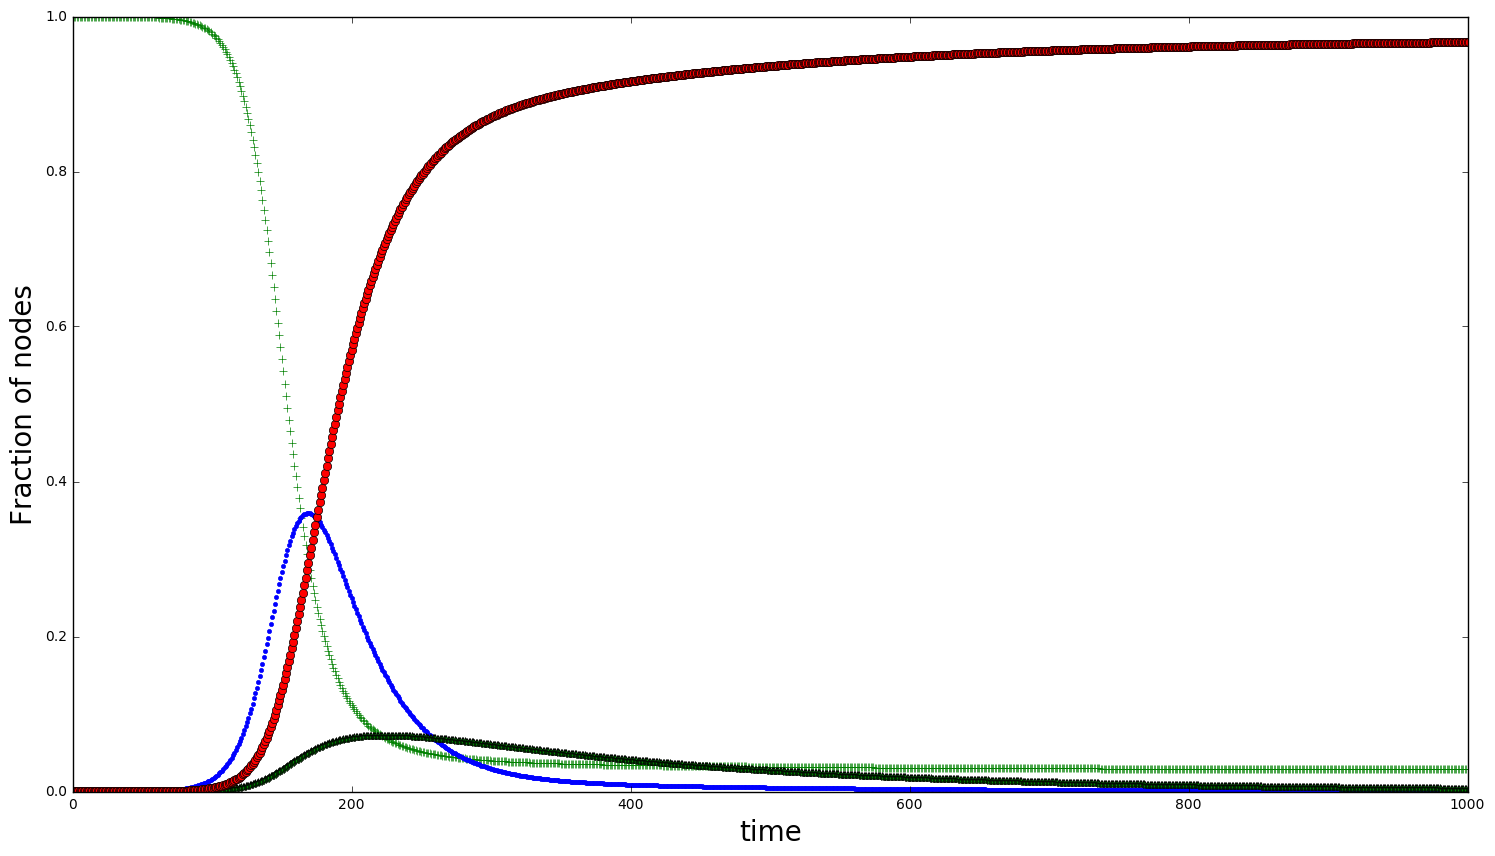

In [2]:
%matplotlib inline
import numpy as np
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt


N = 100000
k = 10
a = float(N-1)/N
b = float(1)/N
c = 0
d = 0
lamda = 0.8
beta = 0.2
delta = 0.6
xi = 0.5
eta = 0.5
alpha = 0.3

hs = 0.01


def fa (a, b, c, d, lamda, beta, k):
    fa = -(lamda+beta)*k*(a*b)
    return fa

def fb (a, b, c, d, lamda, alpha, delta, xi, eta, k):
    fb = lamda*k*a*b - alpha*k*b*(b+c+d) - delta*b+xi*c + eta*k*b*c
    return fb

def fc (a, b, c, d, lamda, delta, xi, eta, k):
    fc = delta*b - xi*c - eta*k*b*c
    return fc

def fd (a, b, c, d, lamda, beta, alpha, k):
    fd = beta*k*a*b + alpha*k*b*(b+c+d)
    return fd


def rK4(a, b, c, d, fa, fb, fc, fd, hs, lamda, beta, alpha, delta, xi, eta, k):
    a1 = fa(a, b, c, d, lamda, beta, k)*hs
    b1 = fb(a, b, c, d, lamda, alpha, delta, xi, eta, k)*hs
    c1 = fc(a, b, c, d, lamda, delta, xi, eta, k)*hs
    d1 = fd(a, b, c, d, lamda, beta, alpha, k)*hs
    ak = a + a1*0.5
    bk = b + b1*0.5
    ck = c + c1*0.5
    dk = d + d1*0.5
    a2 = fa(ak, bk, ck, dk, lamda, beta, k)*hs
    b2 = fb(ak, bk, ck, dk, lamda, alpha, delta, xi, eta, k)*hs
    c2 = fc(ak, bk, ck, dk, lamda, delta, xi, eta, k)*hs
    d2 = fd(ak, bk, ck, dk, lamda, beta, alpha, k)*hs
    ak = a + a2*0.5
    bk = b + b2*0.5
    ck = c + c2*0.5
    dk = d + d2*0.5
    a3 = fa(ak, bk, ck, dk, lamda, beta, k)*hs
    b3 = fb(ak, bk, ck, dk, lamda, alpha, delta, xi, eta, k)*hs
    c3 = fc(ak, bk, ck, dk, lamda, delta, xi, eta, k)*hs
    d3 = fd(ak, bk, ck, dk, lamda, beta, alpha, k)*hs
    ak = a + a3
    bk = b + b3
    ck = c + c3
    dk = d + d3
    a4 = fa(ak, bk, ck, dk, lamda, beta, k)*hs
    b4 = fb(ak, bk, ck, dk, lamda, alpha, delta, xi, eta, k)*hs
    c4 = fc(ak, bk, ck, dk, lamda, delta, xi, eta, k)*hs
    d4 = fd(ak, bk, ck, dk, lamda, beta, alpha, k)*hs
    a = a + (a1 + 2*(a2 + a3) + a4)/6
    b = b + (b1 + 2*(b2 + b3) + b4)/6
    c = c + (c1 + 2*(c2 + c3) + c4)/6
    d = d + (d1 + 2*(d2 + d3) + d4)/6
    return a, b, c, d

ign, spr, hib, sti = [],[],[],[]
for i in xrange(10000):
    ign.append(a)
    spr.append(b)
    hib.append(c)
    sti.append(d)
    a,b,c,d = rK4(a, b, c, d, fa, fb, fc, fd, hs, lamda, beta, alpha, delta, xi, eta, k)
   

f = plt.figure(figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k');   
plt.plot(ign, '+', color="green", label='Susceptibility');
plt.plot(spr, '.', label='Susceptibility');
plt.plot(hib, '*', label='Susceptibility');
plt.plot(sti, 'o', label='Susceptibility');
plt.xlabel("time", fontsize=20);
plt.ylabel("Fraction of nodes", fontsize=20);
plt.xlim(0,1000)
plt.show()

